#  Implementation of a Black-Scholes-Merton call option class

In [1]:
#
# Valuation of European call options in Black-Scholes-Merton Model
# incl. Vega function and implied volatility estimation
# -- class-based implementation
# bsm_option_class.py #

from math import log, sqrt, exp 
from scipy import stats
import math

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from pylab import cm
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
class call_option:
    '''Class for European all option in BSM model
    
    Attributes
    ==========
    Attributes
    ==========
    S0 : float
        initial stock/index level
    K : float
        strike price
    T : float
        maturity (in year fractions)
    r : float
        constant risk-free short rate
    sigma : float
        volatility factor in diffusion term
        
    Methods
    =======
    value : float
        return present value of call option
    vega : float
        return Vega of call option
    imp_vol: float
        return implied volatility given option quote
    '''
    
    def __init__(self, S0, K, T, r, sigma):
        self.S0 = float(S0)
        self.K = K
        self.T = T
        self.r = r 
        self.sigma = sigma
        
    def value(self):
        ''' Returns option value. '''        
        d1=(log(self.S0/self.K)+(self.r+0.5*self.sigma**2)*self.T)/(self.sigma*sqrt(self.T)) 
        d2=(log(self.S0/self.K)+(self.r-0.5*self.sigma**2)*self.T)/(self.sigma*sqrt(self.T))
        value = (self.S0 * stats.norm.cdf(d1, 0.0, 1.0)
                    - self.K * exp(-self.r * self.T) * stats.norm.cdf(d2, 0.0, 1.0)) 
        return value
    
    def vega(self):
        ''' Returns Vega of option. ''' 
        d1 = ((log(self.S0 / self.K)+ (self.r + 0.5 * self.sigma ** 2) * self.T)/ (self.sigma * sqrt(self.T)))
        vega = self.S0 * stats.norm.cdf(d1, 0.0, 1.0) * sqrt(self.T) 
        return vega
    
    def imp_vol(self, C0, sigma_est=0.2, it=100):
        ''' Returns implied volatility given option price. '''
        option = call_option(self.S0, self.K, self.T, self.r, sigma_est) 
        for i in range(it):
            option.sigma -= (option.value() - C0) / option.vega() 
        return option.sigma 
    
p1 = call_option(100., 105., 1.0, 0.05, 0.2)

In [3]:
type(p1)

__main__.call_option

In [4]:
value = p1.value()
value

8.021352235143176

The option class can be easily used to visualize, for example, the value and Vega of the option for different strikes and maturities. This is, in the end, one of the major advan‐ tages of having such formulae available. The following Python code generates the option statistics for different maturity-strike combinations:

In [9]:
maturities = np.linspace(0.05, 2.0, 20) 
strikes = np.linspace(80, 120, 20)
T, K = np.meshgrid(strikes, maturities)
C = np.zeros_like(K)
V = np.zeros_like(C)
for t in enumerate(maturities):
    for k in enumerate(strikes):
        p1.T = t[1]
        p1.K = k[1]
        C[t[0], k[0]] = p1.value()
        V[t[0], k[0]] = p1.vega()
          

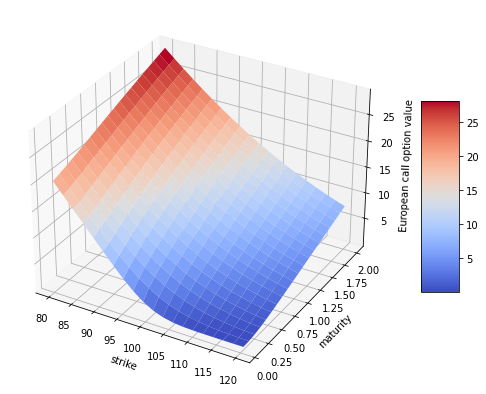

In [15]:
# First, let us have a look at the option values. For plotting, we need to import some libraries and functions:
fig = plt.figure(figsize=(12, 7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, K, C, rstride=1, cstride=1,
              cmap=cm.coolwarm, linewidth=0.5, antialiased=True) 
ax.set_xlabel('strike')
ax.set_ylabel('maturity') 
ax.set_zlabel('European call option value') 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

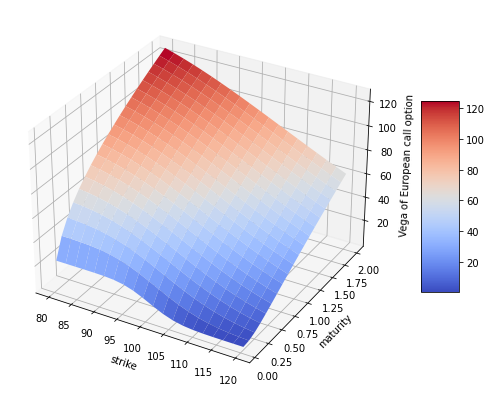

In [14]:
# Second, we have the results for the Vega of the call option
fig = plt.figure(figsize=(12, 7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, K, V, rstride=1, cstride=1,
                cmap=cm.coolwarm, linewidth=0.5, antialiased=True) 
ax.set_xlabel('strike')
ax.set_ylabel('maturity') 
ax.set_zlabel('Vega of European call option')
fig.colorbar(surf, shrink=0.5, aspect=5) 
plt.show()